In [1]:
from sp_6_helper import *

In [2]:
mesh_resolution_randomFieldVBar = 6 # 6 -> 40 seconds, 8 -> 2:50 minutes, 12 -> 15 minutes
randomFieldVBar = calculate_randomFieldVBar(mesh_resolution_randomFieldVBar)

In [ ]:
# Test perturbed mesh

mesh_resolution = 12

mesh = create_mesh(mesh_resolution)
omega_2 = sample_omega_2(randomFieldVBar)
r = 0.02

perturbed_mesh = perturb_mesh(mesh, omega_2, r, randomFieldVBar)

# Create points on the circle
thetas = np.linspace(0, 2 * np.pi, 500)
circle_points = np.array([0.16 + 0.02 * np.cos(thetas), 0.16 + 0.02 * np.sin(thetas)]).T
perturbed_circle_points = np.array([perturbation_function(circle_point, omega_2, r, randomFieldVBar) for circle_point in circle_points])


# Plots
plt.figure(figsize=(3, 3))

# Plot circle and perturbed points
fe.plot(mesh, title=r'Reference Mesh for $\Omega_{ref}$')
plt.scatter(circle_points[:, 0], circle_points[:, 1], label='Circle', s=1)
plt.scatter(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], label='Perturbed Circle', s=1)
plt.title('Perturbation of Circle')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper right')
plt.xlim(- 0.02, 0.32 + 0.02)
plt.ylim(- 0.02, 0.32 + 0.02)
plt.show()


In [ ]:
inner_circle_boundary_points = []
left_boundary_points = []
right_boundary_points = []
first_cell = fe.Cell(mesh, 0)
vertex_length = first_cell.h()
for point in mesh.coordinates():
    if euclidean_distance(point, np.array([0.16, 0.16])) < 0.02 + vertex_length/4:
        inner_circle_boundary_points.append(point)
    elif point[0] == 0:
        left_boundary_points.append(point)
    elif point[0] == 0.32:
        right_boundary_points.append(point)
inner_circle_boundary_points = np.array(inner_circle_boundary_points)
left_boundary_points = np.array(left_boundary_points)
right_boundary_points = np.array(right_boundary_points)

plt.figure(figsize=(8, 16))
# Plot the mesh and boundary points
plt.subplot(1, 2, 1)
fe.plot(mesh, title=r'Reference Mesh for $\Omega_{ref}$')
plt.scatter(inner_circle_boundary_points[:, 0], inner_circle_boundary_points[:, 1], color='cyan', s=10, label='Circle Boundary Points')
plt.scatter(left_boundary_points[:, 0], left_boundary_points[:, 1], color='blue', s=10, label='Left Boundary Points')
plt.scatter(right_boundary_points[:, 0], right_boundary_points[:, 1], color='green', s=10, label='Right Boundary Points')
plt.xlabel(r'$\hat{x}_1$')
plt.ylabel(r'$\hat{x}_2$')
plt.legend(loc='upper right')
plt.xlim(- 0.02, 0.32 + 0.02)
plt.ylim(- 0.02, 0.32 + 0.02)

inner_circle_boundary_points_perturbed = []
for point in inner_circle_boundary_points:
    inner_circle_boundary_points_perturbed.append(perturbation_function(point, omega_2, r, randomFieldVBar))
inner_circle_boundary_points_perturbed = np.array(inner_circle_boundary_points_perturbed)

# Plot perturbed mesh
plt.subplot(1, 2, 2)
fe.plot(perturbed_mesh, title=r'Perturbed Mesh for $\Omega(\omega_2)$')
plt.scatter(inner_circle_boundary_points_perturbed[:, 0], inner_circle_boundary_points_perturbed[:, 1], color='cyan', s=10, label='Circle Boundary Points')
plt.scatter(left_boundary_points[:, 0], left_boundary_points[:, 1], color='blue', s=10, label='Left Boundary Points')
plt.scatter(right_boundary_points[:, 0], right_boundary_points[:, 1], color='green', s=10, label='Right Boundary Points')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper right')
plt.xlim(- 0.02, 0.32 + 0.02)
plt.ylim(- 0.02, 0.32 + 0.02)

plt.tight_layout()
plt.show()

In [ ]:
randomFieldE = calculate_randomFieldE(mesh_resolution)
omega_1 = sample_omega_1(randomFieldE)
randomFieldEExpression = RandomFieldEExpression(randomFieldE, omega_1, omega_2, r, randomFieldVBar)

fig = plt.figure(figsize=(8, 4))

# Plot random field E(V(^x))
W = fe.FunctionSpace(mesh, 'P', 1)
E_proj = fe.project(randomFieldEExpression, W)
plt.subplot(1, 2, 1)
c = fe.plot(E_proj, title=r"Random Field $E(V(\hat{x}, \omega_2), \omega_1)$")
plt.colorbar(c)
plt.xlabel(r'$\hat{x}_1$')
plt.ylabel(r'$\hat{x}_2$')
plt.xlim(- 0.02, 0.32 + 0.02)
plt.ylim(- 0.02, 0.32 + 0.02)

# Plot random field E(x)
W_perturbed = fe.FunctionSpace(perturbed_mesh, "P", 1)
E_perturbed_proj = fe.Function(W_perturbed)
E_perturbed_proj.vector()[:] = E_proj.vector()[:]
plt.subplot(1, 2, 2)
c = fe.plot(E_perturbed_proj, title=r"Random Field $E(x, \omega_1)$")
plt.colorbar(c)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(- 0.02, 0.32 + 0.02)
plt.ylim(- 0.02, 0.32 + 0.02)

plt.tight_layout()
plt.show()

In [ ]:
# Test solving the model
q = sample_q()

u_hat_sol = solve_model(mesh_resolution, omega_1, omega_2, q, randomFieldE, randomFieldVBar)

fig = plt.figure(figsize=(8, 4))
# Plot the solution û
plt.subplot(1, 2, 1)
c = fe.plot(u_hat_sol, title=r'Displacement $\hat{u}(\hat{x}, \omega)$')
plt.scatter(circle_points[:, 0], circle_points[:, 1], label='Circle', s=0.005, color='black')
plt.colorbar(c)
plt.title(r'Displacement $\hat{u}(\hat{x}, \omega)$')
plt.xlabel(r'$\hat{x}_1$')
plt.ylabel(r'$\hat{x}_2$')
plt.xlim(- 0.02, 0.32 + 0.02)
plt.ylim(- 0.02, 0.32 + 0.02)

# Plot the solution u
V_perturbed = fe.VectorFunctionSpace(perturbed_mesh, "P", 1)
u_sol = fe.Function(V_perturbed)
u_sol.vector()[:] = u_hat_sol.vector()[:] 
plt.subplot(1, 2, 2)
c = fe.plot(u_sol, title=r'Displacement $u(x, \omega)$')
plt.scatter(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], label='Perturbed Circle', s=0.005, color='black')
plt.colorbar(c)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(- 0.02, 0.32 + 0.02)
plt.ylim(- 0.02, 0.32 + 0.02)

plt.tight_layout()
plt.show()

In [ ]:
# Plot Sigma(û)
randomFieldEExpression = RandomFieldEExpression(randomFieldE, omega_1, omega_2, r, randomFieldVBar)
randomFieldVExpression = RandomFieldVExpression(r, omega_2, domain=mesh, randomFieldVBar=randomFieldVBar)
V = fe.VectorFunctionSpace(mesh, 'P', 1)
randomFieldVProj = fe.project(randomFieldVExpression, V)
W = fe.TensorFunctionSpace(mesh, 'P', 1)
jacobianProj = fe.project(fe.grad(randomFieldVProj), W)

nu = 0.29
left_prefactor = fe.Expression('E / (2 * (1 + nu))', degree=1, E=randomFieldEExpression, nu=nu, domain=mesh)
right_prefactor = fe.Expression('E / (2 * (1 - nu))', degree=1, E=randomFieldEExpression, nu=nu, domain=mesh)

J_inv_T = J_minus_TExpression(jacobianProj, domain=mesh)
J_helper1 = J_helper1Expression(jacobianProj, domain=mesh)
J_helper2 = J_helper2Expression(jacobianProj, domain=mesh)
det_J = J_determinantExpression(jacobianProj, domain=mesh)

def sigma(u):
    return left_prefactor * fe.grad(u) + right_prefactor * fe.div(u) * fe.Identity(2)

def sigma_hat(u): # Stress tensor
    return det_J * left_prefactor * fe.dot(J_inv_T, fe.grad(u)) + right_prefactor * (fe.dot(J_helper1, fe.grad(u)[:, 0]) + fe.dot(J_helper2, fe.grad(u)[:, 1])) * fe.Identity(2)

def sigma_hat_div_det_J(u):
    return sigma_hat(u) / det_J

# sigma_proj = fe.project(sigma_hat_div_det_J(u_hat_sol)[:, 0], V)
#! fe.grad(u_hat_sol) doesnt work 

fig = plt.figure(figsize=(8, 4))

# plt.subplot(1, 2, 1)
# c = fe.plot(sigma_proj, title=r'$\sigma(\hat{u}) \cdot e_1$')
# plt.colorbar(c)
# plt.xlabel(r'$\hat{x}_1$')
# plt.ylabel(r'$\hat{x}_2$')
# plt.xlim(- 0.02, 0.32 + 0.02)
# plt.ylim(- 0.02, 0.32 + 0.02)

# Plot Sigma(u)
# sigma_perturbed_proj = fe.Function(V_perturbed)
# sigma_perturbed_proj.vector()[:] = sigma_proj.vector()[:]
sigma_perturbed_proj = fe.project(sigma(u_sol)[:, 0], V_perturbed)
plt.subplot(1, 2, 2)
c = fe.plot(sigma_perturbed_proj, title=r'$\sigma(u) \cdot e_1$')
plt.colorbar(c)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(- 0.02, 0.32 + 0.02)
plt.ylim(- 0.02, 0.32 + 0.02)

plt.tight_layout()
plt.show()

Building point search tree to accelerate distance queries.
Computed bounding box tree with 255 nodes for 128 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 255 nodes for 128 points.
Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 217 nodes for 109 points.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 217 nodes for 109 points.
q: 59213170.653395265
Building point search tree to accelerate distance queries.
Computed bounding box tree with 217 nodes for 109 points.
sigma_proj([0.32 0.  ]): [45455101.84932831  1682692.81609825]Building point search tree to accelerate distance queries.

sigma_proj([0.32 0.04]): [56989294.94688393 -6472647.70144319]
sigma_proj([0.32 0.02]): [51222198.39810611 -2394977.44267247]
sigma_proj([0.32 0.32]): [52320409.78659265 -2883065.87683863]
sigma_proj([0.32 0.28]): [61699685.299

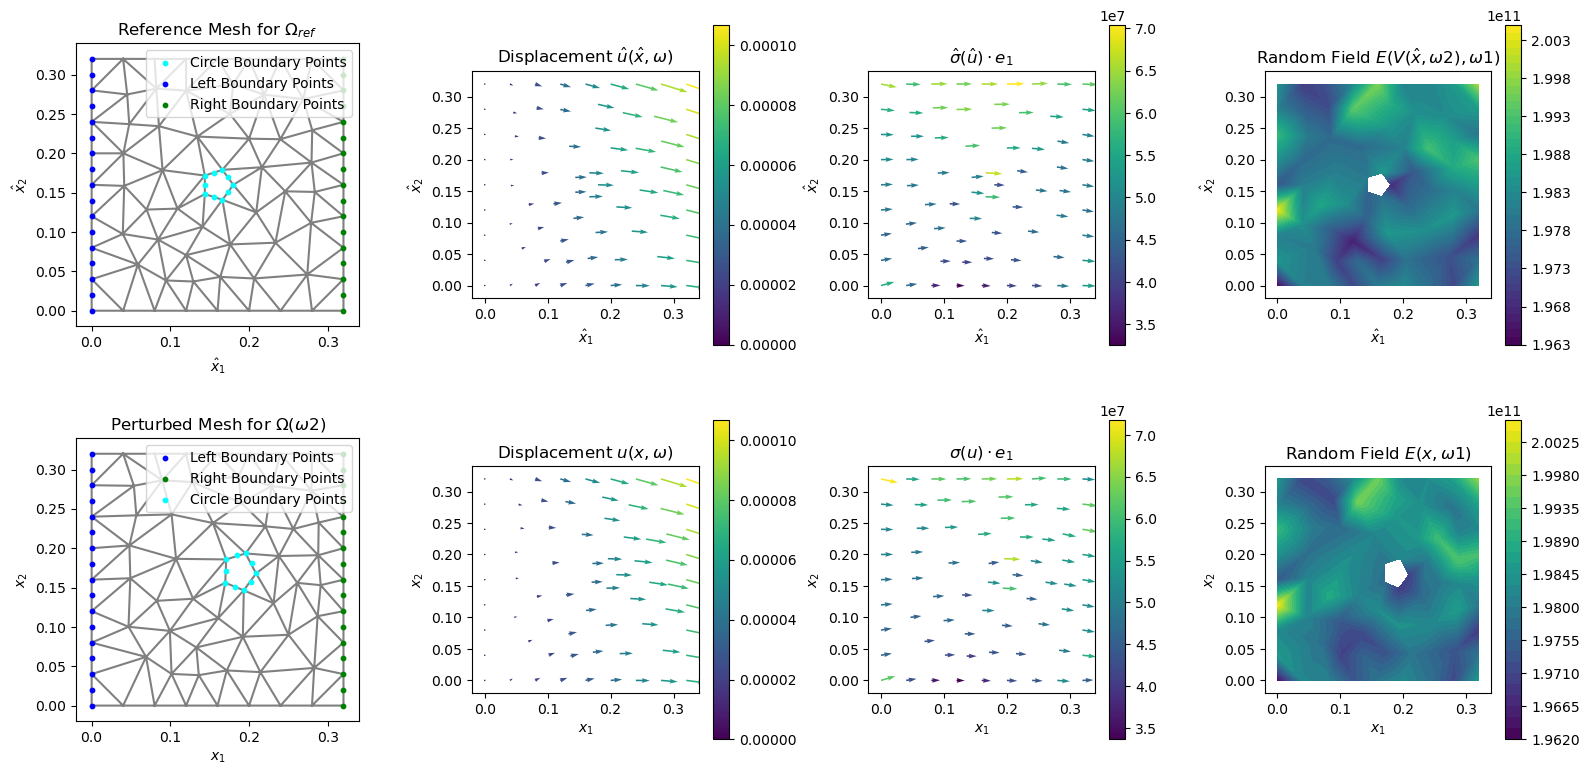

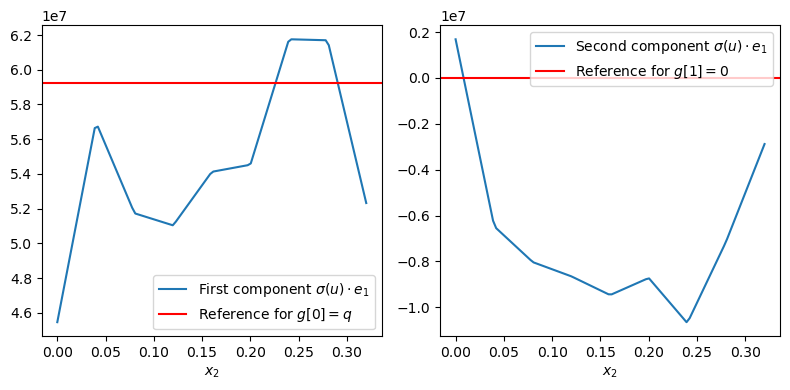

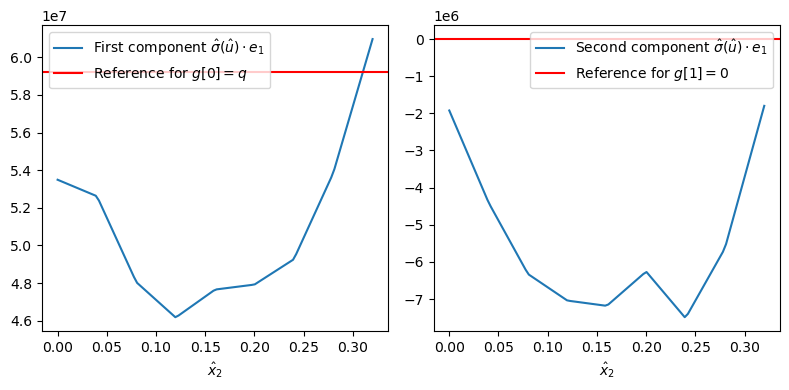

In [1]:
from sp_6_helper import solve_model_with_plots, calculate_randomFieldVBar, calculate_randomFieldE, sample_omega1, sample_omega2, sample_q
mesh_resolution = 6
randomFieldE = calculate_randomFieldE(mesh_resolution)
randomFieldVBar = calculate_randomFieldVBar(mesh_resolution)
omega1 = sample_omega1(randomFieldE)
omega2 = sample_omega2(randomFieldVBar)
q = sample_q()

solve_model_with_plots(mesh_resolution, omega1, omega2, q, randomFieldE, randomFieldVBar)